In [12]:
from dotenv import load_dotenv
import os, pandas as pd, matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.fundamentaldata import FundamentalData

load_dotenv()
AV_KEY = os.getenv("ALPHAVANTAGE_API_KEY")
assert AV_KEY, "Missing ALPHAVANTAGE_API_KEY in .env"

TS = TimeSeries(key=AV_KEY, output_format='pandas')
TI = TechIndicators(key=AV_KEY, output_format='pandas')
FD = FundamentalData(key=AV_KEY, output_format='pandas')



In [13]:
from alpha_vantage.timeseries import TimeSeries

ts = TimeSeries(key=AV_KEY, output_format='pandas')

data, meta = ts.get_daily(symbol="MSFT", outputsize="compact")
print(meta)
print(data.head())


{'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'MSFT', '3. Last Refreshed': '2025-10-24', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}
            1. open  2. high  3. low  4. close   5. volume
date                                                      
2025-10-24   522.79  525.345  520.71    523.61  15532360.0
2025-10-23   522.46  523.950  518.61    520.56  14023532.0
2025-10-22   521.15  525.230  517.71    520.54  18962694.0
2025-10-21   517.50  518.690  513.04    517.66  15586204.0
2025-10-20   514.61  518.700  513.43    516.79  14665620.0


In [14]:
data, meta = TS.get_daily(symbol="AAPL", outputsize="compact")
print(meta)
display(data.head())



{'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'AAPL', '3. Last Refreshed': '2025-10-24', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}


,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2025-10-24,261.190,264.130,259.1800,262.82,38253717.0
2025-10-23,259.940,260.620,258.0101,259.58,32754941.0
2025-10-22,262.650,262.850,255.4300,258.45,45015254.0
2025-10-21,261.880,265.290,261.8300,262.77,46695948.0
2025-10-20,255.885,264.375,255.6300,262.24,90483029.0


In [15]:
quote, _ = TS.get_quote_endpoint(symbol="AAPL")
display(quote)

display(sector_df.head())


,01. symbol,02. open,03. high,04. low,05. price,06. volume,07. latest trading day,08. previous close,09. change,10. change percent
Global Quote,AAPL,261.1900,264.1300,259.1800,262.8200,38253717,2025-10-24,259.5800,3.2400,1.2482%


NameError: name 'sector_df' is not defined

In [16]:
# Simple Moving Average (20-day)
sma, _ = TI.get_sma(symbol="AAPL", interval='daily', time_period=20, series_type='close')
display(sma.tail())

# Relative Strength Index (14-day)
rsi, _ = TI.get_rsi(symbol="AAPL", interval='daily', time_period=14, series_type='close')
display(rsi.tail())


,SMA
date,
1999-12-03,0.7112
1999-12-02,0.6995
1999-12-01,0.6887
1999-11-30,0.6801
1999-11-29,0.6725


,RSI
date,
1999-11-26,70.5350
1999-11-24,70.2012
1999-11-23,68.5184
1999-11-22,66.4703
1999-11-19,69.9838


In [17]:
merged = data.join(sma).join(rsi)
display(merged.tail())


,1. open,2. high,3. low,4. close,5. volume,SMA,RSI
date,,,,,,,
2025-06-10,200.60,204.35,200.57,202.67,54672608.0,203.7778,48.9054
2025-06-09,204.39,206.00,200.02,201.45,72862557.0,204.1833,47.0494
2025-06-06,203.00,205.70,202.05,203.92,46607693.0,204.0253,50.4978
2025-06-05,203.50,204.75,200.15,200.63,55221235.0,203.6920,45.5630
2025-06-04,202.91,206.24,202.10,202.82,43603985.0,203.4612,48.5549


In [18]:
overview, _ = FD.get_company_overview("AAPL")
display(overview.T.head(20))   # Transpose for readability


,None
Symbol,AAPL
AssetType,Common Stock
Name,Apple Inc
Description,Apple Inc. is a leading American multinational...
CIK,320193
Exchange,NASDAQ
Currency,USD
Country,USA
Sector,TECHNOLOGY
Industry,CONSUMER ELECTRONICS


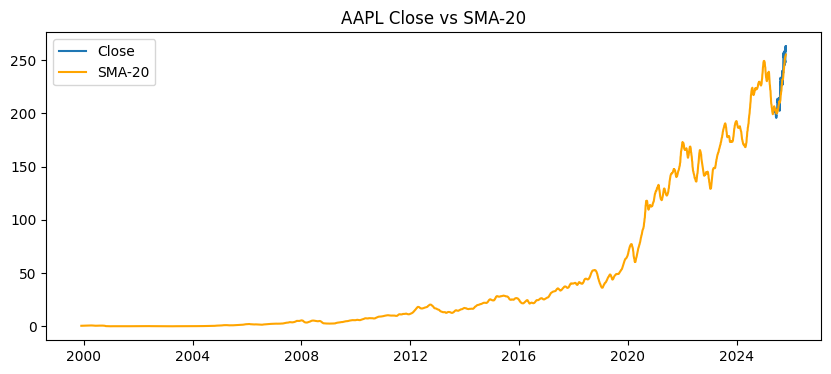

In [19]:
plt.figure(figsize=(10,4))
plt.plot(data.index, data['4. close'], label='Close')
plt.plot(sma.index, sma['SMA'], label='SMA-20', color='orange')
plt.title("AAPL Close vs SMA-20")
plt.legend(); plt.show()


[1/4] pulled AAPL: 100 rows
[2/4] pulled MSFT: 100 rows
[3/4] pulled TSLA: 100 rows
[4/4] pulled NVDA: 100 rows


,AAPL,MSFT,TSLA,NVDA
date,,,,
2025-10-20,262.24,516.79,447.43,182.64
2025-10-21,262.77,517.66,442.60,181.16
2025-10-22,258.45,520.54,438.97,180.28
2025-10-23,259.58,520.56,448.98,182.16
2025-10-24,262.82,523.61,433.72,186.26


,AAPL,MSFT,TSLA,NVDA
date,,,,
2025-10-20,0.039439,0.006250,0.018484,-0.003166
2025-10-21,0.002021,0.001683,-0.010795,-0.008103
2025-10-22,-0.016440,0.005563,-0.008202,-0.004858
2025-10-23,0.004372,0.000038,0.022803,0.010428
2025-10-24,0.012482,0.005859,-0.033988,0.022508


,AAPL,MSFT,TSLA,NVDA
date,,,,
2025-10-20,1.292969,1.114084,1.347478,1.286922
2025-10-21,1.295582,1.115959,1.332932,1.276494
2025-10-22,1.274283,1.122168,1.322000,1.270293
2025-10-23,1.279854,1.122211,1.352146,1.283540
2025-10-24,1.295829,1.128786,1.306189,1.312430


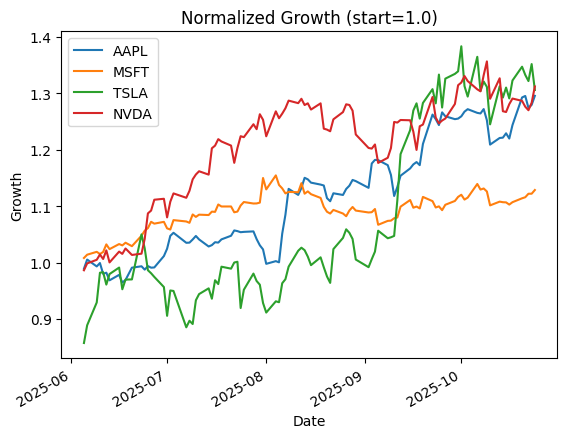

AttributeError: 'numpy.float64' object has no attribute 'plot'

In [20]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tickers = ["AAPL", "MSFT", "TSLA", "NVDA"]  # edit as you like
SLEEP = 12  # keep free-tier happy

def fetch_daily_close(symbol: str) -> pd.Series:
    """Return daily close (Series) for a ticker, newest→oldest index from AV (we'll sort)."""
    df, _ = TS.get_daily(symbol=symbol, outputsize="compact")  # use "full" if you need more history
    s = df["4. close"].rename(symbol)
    return s.sort_index()  # oldest→newest

# 1) Pull data, respecting rate limits
frames = []
for i, sym in enumerate(tickers, 1):
    try:
        s = fetch_daily_close(sym)
        frames.append(s)
        print(f"[{i}/{len(tickers)}] pulled {sym}: {len(s)} rows")
    except Exception as e:
        print(f"!! {sym} failed: {e}")
    time.sleep(SLEEP)

# 2) Wide price table (aligned on date)
prices = pd.concat(frames, axis=1).dropna(how="all")
display(prices.tail())

# 3) Daily returns & cumulative growth (normalize to 1.0 at start)
rets = prices.pct_change().dropna()
growth = (1 + rets).cumprod()
display(rets.tail())
display(growth.tail())

# 4) Quick visuals
ax = growth.plot(title="Normalized Growth (start=1.0)")
ax.set_xlabel("Date"); ax.set_ylabel("Growth")
plt.show()

ax = rets.rolling(20).std() * np.sqrt(252) .plot(title="Rolling 20D Volatility (annualized)")
ax.set_xlabel("Date"); ax.set_ylabel("Vol")
plt.show()
